In [2]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [11]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pycountry

ModuleNotFoundError: No module named 'wordcloud'

## Sentiment Anyalsis 

In [3]:
df = pd.read_csv('test1.csv')

df['tweet']


0     @DrEricDing Ukraine &amp; US cut off COVID vac...
1     @jordanbpeterson All first world countries hav...
2     @XiBrandon10 @winechick4 @CarlosGSmith @Jeffre...
3     Court Denies Biden Administration Attempt to I...
4     So that vaccine that wasn’t needed for kids as...
5     As Ontario scraps vaccine passports, where are...
6     @Gusjackson881 @Leftylockdowns1 @duff_armstron...
7     Pfizer’s COVID-19 Vaccine Goes Into Liver Cell...
8     @boglet12 @CityBureaucrat Scott said something...
9     #Moderna COVID-19 vaccine found to offer an in...
10    @MistyLorenzo1 @wh93142779 @AreOhEssEyeEe Huma...
11    @Ajcool2020 @America89014722 @thehill The QAno...
12    The Daily podcast titled, "Ukraine, Men Who Mu...
13    Court Denies Biden Administration Attempt to I...
14    If this is correct - uhhhh....  Pfizer’s COVID...
15    Now that the Covid and vaccine propaganda has ...
16    Pfizer’s COVID-19 Vaccine Goes Into Liver Cell...
17    Dynasts dented country's self-confidence b

In [4]:
tweets = df['tweet']
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 print(tweet)
 tweet_list.append(tweet)
 analysis = TextBlob(tweet)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
if neg > pos:
 negative_list.append(tweet)
 negative += 1
elif pos > neg:
 positive_list.append(tweet)
 positive += 1
 
elif pos == neg:
 neutral_list.append(tweet)
 neutral += 1
# positive = (positive/len(df['tweet']))*100
# negative = (negative/len(df['tweet']))*100
# neutral = (neutral/len(df['tweet']))*100
# polarity = (polarity/len(df['tweet']))*100
# positive = format(positive, '.1f')
# negative = format(negative, '.1f')
# neutral = format(neutral, '.1f')


@DrEricDing Ukraine &amp; US cut off COVID vaccine for Ukrainians‼️ Russia to supply Ukraine with millions of doses of its vaccine and allow Ukrainian labs to produce it free of charge. BUT Ukraine rejected it &amp; US rejected it accusing Russia of using its vaccine as a tool of political influence  https://t.co/bWjGWNNcUz
@jordanbpeterson All first world countries have mandated covid vaccines and masks to some extent in order to protect their citizens. ALL OF THEM. It's temporary and nothing to cry about.
@XiBrandon10 @winechick4 @CarlosGSmith @JeffreyBrandes @this Florida radio and Newsmax host who opposed Covid vaccine ... https://t.co/j2OFb1Ct7P › news › us-news › florida-r... Aug 8, 2021 — Dick Farrel, a former right-wing radio host in Florida and anchor on Newsmax TV, died Wednesday of complications from Covid-19, ...
Court Denies Biden Administration Attempt to Impose COVID-19 Vaccine Mandate on Navy SEALs  https://t.co/KJ1CH4TARF via @epochtimes
So that vaccine that wasn’t nee

## Pie Chart

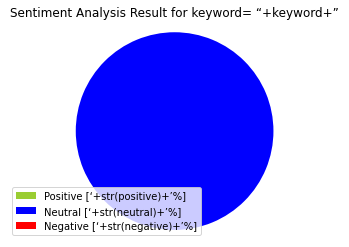

In [17]:
labels = ['Positive [‘+str(positive)+’%]' , 'Neutral [‘+str(neutral)+’%]','Negative [‘+str(negative)+’%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= “+keyword+”' )
plt.axis('equal')
plt.show()


In [19]:
print(positive)

0.0


In [23]:
print(neutral_list)

['@wstrickRTR @EdFiedler2 @artkitchen76 Oh, please?!  Ron DeathSantis is a wannabe autocrat.  Wonder how much $$ he\'s paying that "physician" in FL to lie to Floridians RE Covid &amp; all vaccines.']


In [28]:
tweets[1].strip().encode('ascii','ignore')

b"@jordanbpeterson All first world countries have mandated covid vaccines and masks to some extent in order to protect their citizens. ALL OF THEM. It's temporary and nothing to cry about."

In [29]:
tweets[1]

"@jordanbpeterson All first world countries have mandated covid vaccines and masks to some extent in order to protect their citizens. ALL OF THEM. It's temporary and nothing to cry about."

In [36]:
##cleaning up tweet
text = tweets[1]
text = re.sub(r'@[A-Za-z0-9]+', '', text)
text = re.sub(r'#', '', text)
text = re.sub(r'RT[\s]+','', text)
text = re.sub(r'https?:\/\/\S+', '', text)


In [38]:
TextBlob(text).sentiment.subjectivity

0.3333333333333333

In [39]:
TextBlob(text).sentiment.polarity

0.25

In [10]:
df = pd.read_csv('covidvaccinetweet1.csv')
tweets = list(df['tweet'])
cleaned_tweets = []
subjectivity = []
polarity = []

for tweet in tweets:
    text = ""
    text = tweet
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    cleaned_tweets.append(text)
    subjectivity.append(TextBlob(text).sentiment.subjectivity)
    polarity.append(TextBlob(text).sentiment.subjectivity)
df['Cleaned Tweet'] = cleaned_tweets
df['Subjectivity'] = subjectivity
df['Polarity'] = polarity


In [11]:
def getAnlaysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: 
        return 'Postive'

df['Analysis'] = df['Polarity'].apply(getAnlaysis)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Cleaned Tweet,Subjectivity,Polarity,Analysis
0,1509216024901603335,1508995198486994949,2022-03-30 12:08:34 CDT,2022-03-30,12:08:34,-500,1443440983648227331,darealiistky,Bran,NaN,...,NaN,"[{'screen_name': 'jameswiththe3', 'name': 'Eth...",NaN,NaN,NaN,NaN,Trump would've handled the vaccines complet...,0.600000,0.600000,Postive
1,1509216023265771525,1508090827435876361,2022-03-30 12:08:34 CDT,2022-03-30,12:08:34,-500,1259054889436459008,partywolfzayn,The Black Brad Pitt #BLM #ACAB,NaN,...,NaN,"[{'screen_name': 'sailorrooscout', 'name': 'Ch...",NaN,NaN,NaN,NaN,It’s insane to me that there’s still question...,1.000000,1.000000,Postive
2,1509216005666623503,1509155905719480330,2022-03-30 12:08:30 CDT,2022-03-30,12:08:30,-500,1101548612406964225,dippyand,Dippy and Wyse 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇺🇦🌻🇪🇺🕷,NaN,...,NaN,"[{'screen_name': 'mark_mclaughlin', 'name': 'M...",NaN,NaN,NaN,NaN,_mclaughlin Which leading scientist? a couple...,0.337500,0.337500,Postive
3,1509215998557274112,1509215998557274112,2022-03-30 12:08:28 CDT,2022-03-30,12:08:28,-500,1246063594900512769,dynavaxcorp,Dynavax,NaN,...,NaN,[],NaN,NaN,NaN,NaN,ICYMI: The 2022 adult immunization schedule ha...,0.300000,0.300000,Postive
4,1509215998519431169,1505502651429138436,2022-03-30 12:08:28 CDT,2022-03-30,12:08:28,-500,1504827818525569028,streetstarandy5,StreetStarAndy King 🚚🚛🚚🏴󠁧󠁢󠁷󠁬󠁳󠁿 🇷🇺,NaN,...,NaN,"[{'screen_name': 'gree92814918', 'name': 'Sam ...",NaN,NaN,NaN,NaN,No there's Billions of us Anti Vaccines Hero'...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1509210145284247553,1509210145284247553,2022-03-30 11:45:13 CDT,2022-03-30,11:45:13,-500,1154119959275921408,busyburn,BusyBurn,NaN,...,NaN,[],NaN,NaN,NaN,NaN,2 B.C. doctors linked to website selling bogus...,0.000000,0.000000,Neutral
1005,1509210136014999555,1508711847171702787,2022-03-30 11:45:10 CDT,2022-03-30,11:45:10,-500,1495025280053874689,ortega_maranda,Maranda Ortega,NaN,...,NaN,"[{'screen_name': '_This_is_Kitty_', 'name': 'G...",NaN,NaN,NaN,NaN,@_This_is_Kitty_ But that's much less the cas...,0.223333,0.223333,Postive
1006,1509210127223513092,1509162889831239684,2022-03-30 11:45:08 CDT,2022-03-30,11:45:08,-500,567727922,midnucas,Bájenle el deo a Colón 🇵🇷,NaN,...,NaN,"[{'screen_name': 'tapas321', 'name': 'Lee Stew...",NaN,NaN,NaN,NaN,"Ventilation, purification and masks work the...",0.312500,0.312500,Postive
1007,1509210124241494025,1509209710557339663,2022-03-30 11:45:08 CDT,2022-03-30,11:45:08,-500,201421060,ghs,Global Health Strategies,NaN,...,NaN,"[{'screen_name': 'WHO', 'name': 'World Health ...",NaN,NaN,NaN,NaN,"""Addressing this situation would require sig...",0.632778,0.632778,Postive


In [24]:
#Printing all of the postive tweets
j=1
sortedDF = df.sort_values(by=['compound'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Postive'):
        print(str(j) + ') ' + sortedDF["Cleaned Tweet"][i])
        print()
        j=j+1

1) BioNTech to return almost €2bn to shareholders after Covid vaccine success  

2) 2/ At the height of the initial wave in early 2021 - - - before vaccines----I was exposed during an 8-hour period to COVID-19 by sharing a 1,000 sq. foot office space w/ 2 COVID+ individuals. Space had only 1 bathroom. My boss brought his 8 y/o kid work &amp; both were symptomatic.

3) An online job refused to accept a photo copy of my vaccine cards 🤦🏾‍♂️

4)  The chips in my 2x vaccines and booster shot inhibit my ability to register for your glorious site.  Damned Bill Gates.

5)  Yes! This isn’t the first time or the fully-vaccinated cruise to have an outbreak. However, today - vaccine passports and mandatory vaccination policies are still in place in many settings! It is really crazy. I don’t get it.

6) We’ve streamlined best practices for vaccinestorage into 10 easy steps, including the support of our ColdStream Site solution - a vaccine-ready, stationary temperature monitoring solution. Find all 

In [25]:
#Printing all of the negative tweets
j=1
sortedDF = df.sort_values(by=['compound'])
for i in range(0, sortedDF.shape[0]):
    if ( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF["Cleaned Tweet"][i])
        print()
        j=j+1

1)  It’s insane to me that there’s still questions about vaccines when WE ALMOST ERADICATED POLIO WITH THEM; does no one remember this?

2) _mclaughlin  Which leading scientist? a couple more weeks is no inconvenience to many people, the ones that are rattling on usually have a political axe to grind.Sir Andrew Pollard Oxford Vaccine Group, described the idea of achieving herd immunity as "mythical."

3)  No there's Billions of us Anti Vaccines Hero's here on Twitter 😛😛

4) as a cancer this is me

5)  _Arendse Vaccines are not mandatory if people are losing jobs because of it they need to bring a class action against their employers at the labour court. People are complacent when they have remedies available to them.

6)   _ Seeing as you're apparently choosing to miss the point entirely, I'll just agree with you when it comes to not having opinions when it comes to things I have no experience with, so neither of us can say anything about vaccines as I doubt you have any medical degree

## Testing Out VADER

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [21]:
df = pd.read_csv('covidvaccinetweet1.csv')
tweets = list(df['tweet'])
cleaned_tweets = []
scores = []
compounds = []

for tweet in tweets:
    text = ""
    text = tweet
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    cleaned_tweets.append(text)
    score = sid.polarity_scores(text)
    scores.append(score)
    compound = score['compound']
    compounds.append(compound)
df['Cleaned Tweet'] = cleaned_tweets
df['scores'] = scores
df['compound'] = compounds


In [22]:
def getAnlaysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: 
        return 'Postive'

df['Analysis'] = df['compound'].apply(getAnlaysis)
